In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Временные ряды - важная разновидность структурированных данных. Для многих временных рядов характерна фиксированная частота, то есть интервалы между соседними точками одинаковы. Но временной ряд может быть и нерегулярным, когда интревалы между соседними точками различаются.

Как разметить временной ряд и обращаться к нему зависит от приложения. Существуют различные варианты:


    - временные метки, конкретные моменты времени
    
    - фиксированные периоды, например январь 2007 года или весь 2010 год
    
    - временные интервалы, обозначаемые метками начала и конца
    
    - время эксперимента или истекшее время

# Типы данных и инструменты, относящиеся к дате и времени

In [3]:
# В стандартной библиотеке имеются типы данных для представления даты и времени, а также средства, относящиеся
# к календарю. Начинать изучение надо с модулей datetime, time или calendar

In [2]:
from datetime import datetime

In [3]:
now = datetime.now() # время и дата сейчас
now

datetime.datetime(2022, 4, 15, 20, 46, 17, 948369)

In [4]:
# давай теперь этот объект разбирать

now.year

2022

In [6]:
now.year, now.month, now.day

(2022, 4, 15)

In [9]:
delta = datetime.now() - datetime(2011, 1, 7)
delta

datetime.timedelta(days=4116, seconds=75217, microseconds=514189)

In [12]:
delta.days

4116

In [25]:
from datetime import timedelta, date, time

start = datetime(2011, 12, 20) # год месяц число

start + timedelta(5, 12, 23)

datetime.datetime(2011, 12, 25, 0, 0, 12, 23)

In [22]:
# Типы в модуле datetime:
    
# date - хранит дату по григорианскому календарю (год, месяц, число)

# time - хранит время суток (часы, минуты, секунды и микросекунды)

# datetime - хранит дату и время

# timedelta - представляет разность между двумя значениями типа datetime(дни, секунды и микросекунды)

# tzinfo - базовый тип для хранения информации и часовых поясах

In [30]:
date(2000, 12, 20)

datetime.date(2000, 12, 20)

In [32]:
datetime(2000, 12, 20)

datetime.datetime(2000, 12, 20, 0, 0)

In [33]:
datetime.now()

datetime.datetime(2022, 4, 15, 21, 3, 44, 360851)

# Преобразование между строкой и datetime

In [34]:
stamp = datetime(2022, 4, 15)

In [35]:
str(stamp) # просто преобразовали к строке объект

'2022-04-15 00:00:00'

In [38]:
stamp.strftime('%Y-%m-%d')

'2022-04-15'

In [39]:
stamp

datetime.datetime(2022, 4, 15, 0, 0)

In [40]:
stamp.strftime('%F')

'2022-04-15'

In [43]:
# Многие из этих кодов используются для преобразования строк в даты методом datetime.strptime:

value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [44]:
date = ['7/6/2011', '12/6/2015', '16/6/2013', '4/6/2010']

In [47]:
[datetime.strptime(x, '%d/%m/%Y') for x in date]

[datetime.datetime(2011, 6, 7, 0, 0),
 datetime.datetime(2015, 6, 12, 0, 0),
 datetime.datetime(2013, 6, 16, 0, 0),
 datetime.datetime(2010, 6, 4, 0, 0)]

In [56]:
from dateutil.parser import parse

parse('2001-12-12')

datetime.datetime(2001, 12, 12, 0, 0)

In [52]:
# detautil умеет разбирать почти любое представление даты, понятное человеку:

parse('Jan 31, 1994, 10:45')

datetime.datetime(1994, 1, 31, 10, 45)

In [53]:
date

['7/6/2011', '12/6/2015', '16/6/2013', '4/6/2010']

In [54]:
[parse(i) for i in date]

[datetime.datetime(2011, 7, 6, 0, 0),
 datetime.datetime(2015, 12, 6, 0, 0),
 datetime.datetime(2013, 6, 16, 0, 0),
 datetime.datetime(2010, 4, 6, 0, 0)]

In [58]:
# Но!!!! Иногда в других локалях бывает, что день предшествует месяцу, то следует задать параметр dayfirst=True

parse('2001-15-12', dayfirst=True)

datetime.datetime(2001, 12, 15, 0, 0)

In [59]:
# Библиотека pandas ориентирована на работу с массивами дат, используемых в качестве осевого индекса или столбца DF

In [78]:
# Метод to_datetime разбирает различные представления даты:

datedtrs = ['2011-07-06 12:00:00', '2011-08-06']

pd.to_datetime(datedtrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [65]:
# Кроме того, этот метод умеет обрабатывать значения которые следует считать отсутствующими (None, пустая строка и так далее)

In [79]:
datedtrs

['2011-07-06 12:00:00', '2011-08-06']

In [80]:
datedtrs + [None]

['2011-07-06 12:00:00', '2011-08-06', None]

In [84]:
indx = pd.to_datetime(datedtrs + ([None]))

In [82]:
indx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [89]:
# 'NaT' - not a time, то есть это не время, применяемое в pandas обозначение остутствующей временной ветки

In [88]:
indx.isnull()

array([False, False,  True])

In [91]:
# У объектов datetime имеется также ряд зависимых от локали параметров форматирования для других стран и языков:
    
# %a - сокращенное название дня недели

# %A - полное название дня недели

# %b - сокращенное название месяца

# %B - полное название месяца

# %c - полная дата и время, например "Tue 01 May 2012 04:20:57 PM"

# %p - локализованный эквивалент AM и PM

# %x - дата в формате, соответствующей локали. Например, в США 1 мая 2012 будет: '05/01/2012'

# %X - дата в формате, соответствующем локали, например, '04:24:12 PM'

# Основы работы с временными рядами

In [2]:
# Самый простой вид временного ряда в pandas жто объект Series, индексированный временным метками:

dates = [datetime(2011, 12, 20), datetime(2012, 12, 20), datetime(2014, 12, 20), datetime(2015, 12, 20)]

ts = pd.Series(np.random.randn(4), index=dates)

In [3]:
ts

2011-12-20   -0.486135
2012-12-20   -0.668898
2014-12-20   -0.358223
2015-12-20    1.189751
dtype: float64

In [4]:
# Под капотом объкты datetime помещаются в объект типа Datetime.index

ts.index

DatetimeIndex(['2011-12-20', '2012-12-20', '2014-12-20', '2015-12-20'], dtype='datetime64[ns]', freq=None)

In [5]:
# Как и для других объектов Series, арифметические операции над ВР с различными индексами автоматически приводит
# к выравниванию дат.

ts

2011-12-20   -0.486135
2012-12-20   -0.668898
2014-12-20   -0.358223
2015-12-20    1.189751
dtype: float64

In [6]:
ts[::2]

2011-12-20   -0.486135
2014-12-20   -0.358223
dtype: float64

In [7]:
ts + ts[::2]

2011-12-20   -0.972270
2012-12-20         NaN
2014-12-20   -0.716446
2015-12-20         NaN
dtype: float64

In [8]:
ts[0] + np.nan

nan

In [9]:
# В Pandas временные метки хранятся в типе данных numpy datetime64 с наносекундным разрешением

ts.index

DatetimeIndex(['2011-12-20', '2012-12-20', '2014-12-20', '2015-12-20'], dtype='datetime64[ns]', freq=None)

In [10]:
ts.index.dtype

dtype('<M8[ns]')

In [11]:
type(ts[0])

numpy.float64

In [16]:
# Скалярные значения в индексе Datetimeindex - это объекты Pandas типа Timestamp

ts.index[0]

Timestamp('2011-12-20 00:00:00')

In [17]:
# Объект Timestamp можно использовать всюду, где допустим объект datetime. Кроме того, в нем можно хранить инофрмацию
# о частоте и он умеет преобразовывать часовые пояса.

# Индексирование, выборка, подмножества

In [18]:
# TimeSeries - подкласс series, и поэтому ведет себя точно также по отношению к индексированию и выборке данных по метке

In [23]:
ts

2011-12-20   -0.486135
2012-12-20   -0.668898
2014-12-20   -0.358223
2015-12-20    1.189751
dtype: float64

In [22]:
ts[ts.index[0]]

-0.48613517584468774

In [24]:
# Также, можем просто обратиться и передать строку в виде даты:

ts['20111220']


-0.48613517584468774

In [25]:
ts['2011/12/20']


-0.48613517584468774

In [29]:
ts['2011']


2011-12-20   -0.486135
dtype: float64

In [34]:
# Для выборки срезов из длинных временных рядов можно передать только год или месяц или год и месяц:

long_time = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
long_time

2000-01-01   -0.563815
2000-01-02   -2.592951
2000-01-03   -0.873213
2000-01-04   -1.644853
2000-01-05    1.076934
                ...   
2002-09-22   -0.832243
2002-09-23    0.796177
2002-09-24   -0.467204
2002-09-25    0.022272
2002-09-26   -2.028035
Freq: D, Length: 1000, dtype: float64

In [37]:
long_time['2000-01'] # то есть видим, что поиск работает и только по указанному году, или году и месяце

2000-01-01   -0.563815
2000-01-02   -2.592951
2000-01-03   -0.873213
2000-01-04   -1.644853
2000-01-05    1.076934
2000-01-06   -2.279444
2000-01-07    1.342211
2000-01-08    1.548663
2000-01-09    0.680456
2000-01-10   -1.563870
2000-01-11    1.470084
2000-01-12    0.347649
2000-01-13    0.148303
2000-01-14   -0.068537
2000-01-15    0.527276
2000-01-16   -1.069678
2000-01-17   -1.656918
2000-01-18    0.876109
2000-01-19    0.471598
2000-01-20    0.252436
2000-01-21   -1.799577
2000-01-22   -1.215728
2000-01-23    0.202495
2000-01-24   -0.281527
2000-01-25    1.594795
2000-01-26    0.916499
2000-01-27    0.365362
2000-01-28   -0.768304
2000-01-29   -1.392488
2000-01-30    0.509007
2000-01-31    0.439523
Freq: D, dtype: float64

In [42]:
# Выборка срезов с помщью datetime тоже работает:

long_time[datetime(2000,12,20):]

2000-12-20   -0.686336
2000-12-21    0.673952
2000-12-22   -0.845286
2000-12-23    0.038127
2000-12-24   -0.289675
                ...   
2002-09-22   -0.832243
2002-09-23    0.796177
2002-09-24   -0.467204
2002-09-25    0.022272
2002-09-26   -2.028035
Freq: D, Length: 646, dtype: float64

In [43]:
ts

2011-12-20   -0.486135
2012-12-20   -0.668898
2014-12-20   -0.358223
2015-12-20    1.189751
dtype: float64

In [47]:
long_time['2000/01/06' : '2002-09-20'] # довольно удобно так брать срезы

2000-01-06   -2.279444
2000-01-07    1.342211
2000-01-08    1.548663
2000-01-09    0.680456
2000-01-10   -1.563870
                ...   
2002-09-16   -1.162085
2002-09-17    0.201265
2002-09-18    0.828637
2002-09-19    1.556265
2002-09-20   -0.788674
Freq: D, Length: 989, dtype: float64

In [48]:
# Как и раньше можно задавать дату в виде строки, объекта datetime или Timestamp. Но! Такое формирование среза
# порождает прдеставление исходного временного ряда как и для массивов numpy. Это означает, что никакие данные 
# не копируются, а модифкация реза отражается на исходных данных!!!

In [51]:
# Все вышеперечисленное справедливо и для объекта DF, индексированного по строкам:

df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'), index=pd.date_range('2020-12-20', periods=100))

In [52]:
df

,A,B,C,D
2020-12-20,-0.172260,0.118858,-1.440476,1.266611
2020-12-21,1.708489,0.407997,-0.816190,-0.293520
2020-12-22,-0.363497,-2.898898,0.675120,-1.214612
2020-12-23,-1.603361,0.064700,0.483844,-1.181957
2020-12-24,1.285233,0.174729,0.365479,-0.305023
...,...,...,...,...
2021-03-25,-0.422995,0.857627,-0.122335,0.138642
2021-03-26,0.485742,-0.209975,-1.691100,0.998619
2021-03-27,0.083015,-0.200440,-0.079762,-1.207629
2021-03-28,-0.261191,-0.032197,0.433547,0.539240


In [53]:
df.loc['2020']

,A,B,C,D
2020-12-20,-0.172260,0.118858,-1.440476,1.266611
2020-12-21,1.708489,0.407997,-0.816190,-0.293520
2020-12-22,-0.363497,-2.898898,0.675120,-1.214612
2020-12-23,-1.603361,0.064700,0.483844,-1.181957
2020-12-24,1.285233,0.174729,0.365479,-0.305023
2020-12-25,0.319318,-1.011037,0.748937,-0.531686
2020-12-26,-1.347196,0.291963,-1.603762,0.933600
2020-12-27,0.908327,0.629286,0.419871,0.235358
2020-12-28,1.489814,-1.624631,2.548243,-0.990664
2020-12-29,-0.058744,1.243287,1.390555,-0.668441


In [55]:
df.loc[datetime(2020, 12, 27):]

,A,B,C,D
2020-12-27,0.908327,0.629286,0.419871,0.235358
2020-12-28,1.489814,-1.624631,2.548243,-0.990664
2020-12-29,-0.058744,1.243287,1.390555,-0.668441
2020-12-30,1.010417,-0.214911,-0.478986,0.548318
2020-12-31,-0.305517,-0.709822,0.794550,-0.038870
...,...,...,...,...
2021-03-25,-0.422995,0.857627,-0.122335,0.138642
2021-03-26,0.485742,-0.209975,-1.691100,0.998619
2021-03-27,0.083015,-0.200440,-0.079762,-1.207629
2021-03-28,-0.261191,-0.032197,0.433547,0.539240


In [56]:
df.loc['2020-12-27' : '2020/12/30']

,A,B,C,D
2020-12-27,0.908327,0.629286,0.419871,0.235358
2020-12-28,1.489814,-1.624631,2.548243,-0.990664
2020-12-29,-0.058744,1.243287,1.390555,-0.668441
2020-12-30,1.010417,-0.214911,-0.478986,0.548318


# Временные ряды с неуникальными индексами

In [58]:
#  В некоторых приложениях бывает, что несколько результатов измерений имеют одну и ту же временную метку:

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

duplicate_ts = pd.Series(np.arange(5), index=dates)

duplicate_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [59]:
# Узнать о том, что индекс не уникален можно, опросив его свойство is_unique:

duplicate_ts.index.is_unique

False

In [62]:
# При доступе к такому временному ряду по индексу будет возвращено либо скалярное значение, либо срез 
# в зависимости от того, является временная метка уникальной или нет:

duplicate_ts['2000/01/02'] # вернул срез, так как метка не уникальна

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [65]:
# Хорошо, пусть требуется агрегировать данные с неуникальными временными метками. Одно из возможных решений 
# это воспользоваться методом groupby с параметром level=0:

duplicate_ts.groupby(level=0).mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [66]:
duplicate_ts.groupby(level=0).sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

In [67]:
duplicate_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# Диапазоны дат, частоты и сдвиг

In [70]:
# Вообще, временные ряды в Pandas не предполгаются фиксированными, то есть частота в них не фиксированна. Но иногда
# желательно работать с постоянной частотой. Метод resample преобразует один ряд в другой с оперделенной частотой:

ts.resample('D') #строка D это суточная частота

In [75]:
?resample('D')

Object `resample('D')` not found.


## Генерация диапазонов дат

In [76]:
# Метод date_range() порождает объект DatetimeIndex, указанной длины с определенной частотой:

pd.date_range('2011-10-23', periods=10)

DatetimeIndex(['2011-10-23', '2011-10-24', '2011-10-25', '2011-10-26',
               '2011-10-27', '2011-10-28', '2011-10-29', '2011-10-30',
               '2011-10-31', '2011-11-01'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range('2011-10-23', '2012-10-12')

DatetimeIndex(['2011-10-23', '2011-10-24', '2011-10-25', '2011-10-26',
               '2011-10-27', '2011-10-28', '2011-10-29', '2011-10-30',
               '2011-10-31', '2011-11-01',
               ...
               '2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12'],
              dtype='datetime64[ns]', length=356, freq='D')

In [79]:
# По умолчанию метод date_range() генерирует временные метки с частотой в один день. Можно задать также количество 
# генерируемых периодов:

pd.date_range('2010-11-12', '2010-11-19', periods=5)

DatetimeIndex(['2010-11-12 00:00:00', '2010-11-13 18:00:00',
               '2010-11-15 12:00:00', '2010-11-17 06:00:00',
               '2010-11-19 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [80]:
# Тоже интересный случай, например, дана последняя дата, и надо сформировать n дат ДО нее. Легко!:

pd.date_range(end='2010-11-10', periods=15)

DatetimeIndex(['2010-10-27', '2010-10-28', '2010-10-29', '2010-10-30',
               '2010-10-31', '2010-11-01', '2010-11-02', '2010-11-03',
               '2010-11-04', '2010-11-05', '2010-11-06', '2010-11-07',
               '2010-11-08', '2010-11-09', '2010-11-10'],
              dtype='datetime64[ns]', freq='D')

In [87]:
# Начальная и конечная даты определяют строгие границы для сгенерированного индекса по датам. Например, я хочу
# получить индекс по датам, содержащий последний рабочий день каждого месяца:

pd.date_range('2010-02-12', '2010-12-25', freq='BM')

DatetimeIndex(['2010-02-26', '2010-03-31', '2010-04-30', '2010-05-31',
               '2010-06-30', '2010-07-30', '2010-08-31', '2010-09-30',
               '2010-10-29', '2010-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [88]:
# Базовые частоты временных рядов:
    
# D - тип смещения День

# B - каждый рабочий день

# H - каждый час

# T или min - каждую минуту

# S - каждую секунду

# L - каждую миллисекунду

# U - каждую микросекунду

# M - последний календарный день месяца

# BM  - последний рабочий день месяца

# BMS - первый рабочий день месяца

# W-MON,  W-TUE,...  - еженедельно в указанный день

# WOM-1MON, WOM-2TUE - указанный день первой, 2, 3 или 4 недели месяца

# Таблица не полная, остальные значения для кварталов!

In [90]:
# По умолчанию метод date_range() сохраняет время(если оно было задано) начальных и конечных временных меток:

pd.date_range('2010-12-12 12:25', '2011-01-12')

DatetimeIndex(['2010-12-12 12:25:00', '2010-12-13 12:25:00',
               '2010-12-14 12:25:00', '2010-12-15 12:25:00',
               '2010-12-16 12:25:00', '2010-12-17 12:25:00',
               '2010-12-18 12:25:00', '2010-12-19 12:25:00',
               '2010-12-20 12:25:00', '2010-12-21 12:25:00',
               '2010-12-22 12:25:00', '2010-12-23 12:25:00',
               '2010-12-24 12:25:00', '2010-12-25 12:25:00',
               '2010-12-26 12:25:00', '2010-12-27 12:25:00',
               '2010-12-28 12:25:00', '2010-12-29 12:25:00',
               '2010-12-30 12:25:00', '2010-12-31 12:25:00',
               '2011-01-01 12:25:00', '2011-01-02 12:25:00',
               '2011-01-03 12:25:00', '2011-01-04 12:25:00',
               '2011-01-05 12:25:00', '2011-01-06 12:25:00',
               '2011-01-07 12:25:00', '2011-01-08 12:25:00',
               '2011-01-09 12:25:00', '2011-01-10 12:25:00',
               '2011-01-11 12:25:00'],
              dtype='datetime64[ns]', freq='D'

In [94]:
# Иногда начальная или конечная дата содержит время, но требуется сгенерировать нормализованный набор временных меток
# в котором время совпадает с полуночью. Для этого задайте параметр normalize:

pd.date_range('2010-12-12 12:45', periods=10, normalize=True)

DatetimeIndex(['2010-12-12', '2010-12-13', '2010-12-14', '2010-12-15',
               '2010-12-16', '2010-12-17', '2010-12-18', '2010-12-19',
               '2010-12-20', '2010-12-21'],
              dtype='datetime64[ns]', freq='D')

## Частоты и смещения дат

In [99]:
# Частота в Pandas состоит из базовой частоты и кратности. Базовая частота обычно обозначается строкой, например,
# 'M' означает раз в месяц, 'H' раз в час. Для каждой базовой частоты определен объект, называемый 'смещением даты'
# (date offset). Так, частоту "раз в час" можно представить классом Hour:

from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [100]:
# Для определения кратности смещения нужно задать целое число:

four_hours = Hour(4)
four_hours

<4 * Hours>

In [105]:
# В большинстве приложений не приходится создавать такие объекты явно, достаточно использовать их
# строковые обозначения вида '4H' или 'H'. Наличие целого числа перед базовой частотой создает кратную частоту:

pd.date_range('2011-10-12', '2012-12-12', freq='4H')

DatetimeIndex(['2011-10-12 00:00:00', '2011-10-12 04:00:00',
               '2011-10-12 08:00:00', '2011-10-12 12:00:00',
               '2011-10-12 16:00:00', '2011-10-12 20:00:00',
               '2011-10-13 00:00:00', '2011-10-13 04:00:00',
               '2011-10-13 08:00:00', '2011-10-13 12:00:00',
               ...
               '2012-12-10 12:00:00', '2012-12-10 16:00:00',
               '2012-12-10 20:00:00', '2012-12-11 00:00:00',
               '2012-12-11 04:00:00', '2012-12-11 08:00:00',
               '2012-12-11 12:00:00', '2012-12-11 16:00:00',
               '2012-12-11 20:00:00', '2012-12-12 00:00:00'],
              dtype='datetime64[ns]', length=2563, freq='4H')

In [106]:
# А если я хочу задать другое число для кратности, в минутах, например?
# Тогда, удобно воспользоваться операцией сложения для объединения нескольких смещений:

Hour(4) + Minute(30)

<270 * Minutes>

In [108]:
pd.date_range('2022-10-12', periods=100, freq=(Hour(4) + Minute(30)))

DatetimeIndex(['2022-10-12 00:00:00', '2022-10-12 04:30:00',
               '2022-10-12 09:00:00', '2022-10-12 13:30:00',
               '2022-10-12 18:00:00', '2022-10-12 22:30:00',
               '2022-10-13 03:00:00', '2022-10-13 07:30:00',
               '2022-10-13 12:00:00', '2022-10-13 16:30:00',
               '2022-10-13 21:00:00', '2022-10-14 01:30:00',
               '2022-10-14 06:00:00', '2022-10-14 10:30:00',
               '2022-10-14 15:00:00', '2022-10-14 19:30:00',
               '2022-10-15 00:00:00', '2022-10-15 04:30:00',
               '2022-10-15 09:00:00', '2022-10-15 13:30:00',
               '2022-10-15 18:00:00', '2022-10-15 22:30:00',
               '2022-10-16 03:00:00', '2022-10-16 07:30:00',
               '2022-10-16 12:00:00', '2022-10-16 16:30:00',
               '2022-10-16 21:00:00', '2022-10-17 01:30:00',
               '2022-10-17 06:00:00', '2022-10-17 10:30:00',
               '2022-10-17 15:00:00', '2022-10-17 19:30:00',
               '2022-10-

In [111]:
# Результат выше можно получить даже проще, если передать строку '1h30min', что приводит к тому же результату что и выше:

pd.date_range('2022-11-12', '2023', freq='4h30min')

DatetimeIndex(['2022-11-12 00:00:00', '2022-11-12 04:30:00',
               '2022-11-12 09:00:00', '2022-11-12 13:30:00',
               '2022-11-12 18:00:00', '2022-11-12 22:30:00',
               '2022-11-13 03:00:00', '2022-11-13 07:30:00',
               '2022-11-13 12:00:00', '2022-11-13 16:30:00',
               ...
               '2022-12-30 04:30:00', '2022-12-30 09:00:00',
               '2022-12-30 13:30:00', '2022-12-30 18:00:00',
               '2022-12-30 22:30:00', '2022-12-31 03:00:00',
               '2022-12-31 07:30:00', '2022-12-31 12:00:00',
               '2022-12-31 16:30:00', '2022-12-31 21:00:00'],
              dtype='datetime64[ns]', length=267, freq='270T')

In [112]:
# Некоторые частоты описывают неравноотстающие моменты времени. Например, частота значения 'M' (конец календарного месяца)
# и 'BM' последний рабочий день месяца зависят от числа дней в месяце, а также заканчивается ли выходным или рабочим днем
# Такие смещения принято называть "привязанными".

In [115]:
# Полезный класс частот - "неделя месяца", обозначается строкой, начнающейся с 'WOM'. Он позволяет получить,
# например, 3 пятницу каждого месяца:
    
pd.date_range('2022-04-01', '2022-06-17', freq='WOM-3FRI')

DatetimeIndex(['2022-04-15', '2022-05-20', '2022-06-17'], dtype='datetime64[ns]', freq='WOM-3FRI')

## Сдвиг данных (с опережением и запаздыванием)

In [120]:
# Под сдвигом подразумевается перемещение данных назад и вперед по временной оси. У объектов Series и DF
# есть метод shift для наивного сдвига в обе стороны без модификации индекса:

ts = pd.Series(np.random.randn(10), index=pd.date_range('2022-04-17', periods=10, freq='H'))
ts

2022-04-17 00:00:00   -0.830385
2022-04-17 01:00:00    1.554533
2022-04-17 02:00:00    0.793837
2022-04-17 03:00:00   -1.701426
2022-04-17 04:00:00   -0.433116
2022-04-17 05:00:00   -1.083997
2022-04-17 06:00:00    1.550766
2022-04-17 07:00:00    0.871067
2022-04-17 08:00:00    1.216336
2022-04-17 09:00:00   -0.624435
Freq: H, dtype: float64

In [123]:
ts

2022-04-17 00:00:00   -0.830385
2022-04-17 01:00:00    1.554533
2022-04-17 02:00:00    0.793837
2022-04-17 03:00:00   -1.701426
2022-04-17 04:00:00   -0.433116
2022-04-17 05:00:00   -1.083997
2022-04-17 06:00:00    1.550766
2022-04-17 07:00:00    0.871067
2022-04-17 08:00:00    1.216336
2022-04-17 09:00:00   -0.624435
Freq: H, dtype: float64

In [124]:
ts.shift(1) # все данные на 1 позицию сдвинулись!!!

2022-04-17 00:00:00         NaN
2022-04-17 01:00:00   -0.830385
2022-04-17 02:00:00    1.554533
2022-04-17 03:00:00    0.793837
2022-04-17 04:00:00   -1.701426
2022-04-17 05:00:00   -0.433116
2022-04-17 06:00:00   -1.083997
2022-04-17 07:00:00    1.550766
2022-04-17 08:00:00    0.871067
2022-04-17 09:00:00    1.216336
Freq: H, dtype: float64

In [132]:
ts.shift(-1).fillna(10) # все данные на одну позицию вверх сдвинулись11!! удобно!

2022-04-17 00:00:00     1.554533
2022-04-17 01:00:00     0.793837
2022-04-17 02:00:00    -1.701426
2022-04-17 03:00:00    -0.433116
2022-04-17 04:00:00    -1.083997
2022-04-17 05:00:00     1.550766
2022-04-17 06:00:00     0.871067
2022-04-17 07:00:00     1.216336
2022-04-17 08:00:00    -0.624435
2022-04-17 09:00:00    10.000000
Freq: H, dtype: float64

In [139]:
# При таком сдвиге в начало или в конец временного ряда вдивгаются отсутствующие значения.
# Типичное применение shift - вычисление относительных изменений временного ряда или нескольких временных рядов
# и представление их в виде столбцов объекта DF. Это выражается следующим образом:

ts / ts

2022-04-17 00:00:00    1.0
2022-04-17 01:00:00    1.0
2022-04-17 02:00:00    1.0
2022-04-17 03:00:00    1.0
2022-04-17 04:00:00    1.0
2022-04-17 05:00:00    1.0
2022-04-17 06:00:00    1.0
2022-04-17 07:00:00    1.0
2022-04-17 08:00:00    1.0
2022-04-17 09:00:00    1.0
Freq: H, dtype: float64

In [140]:
ts / ts.shift(1) - 1

2022-04-17 00:00:00         NaN
2022-04-17 01:00:00   -2.872063
2022-04-17 02:00:00   -0.489341
2022-04-17 03:00:00   -3.143295
2022-04-17 04:00:00   -0.745440
2022-04-17 05:00:00    1.502788
2022-04-17 06:00:00   -2.430601
2022-04-17 07:00:00   -0.438299
2022-04-17 08:00:00    0.396374
2022-04-17 09:00:00   -1.513374
Freq: H, dtype: float64

In [148]:
# Поскольку наивный сдвиг не изменяет индекс, то некоторые данные отбрасываются. Но если известна частота,
# то ее можно передать методу shift, чтобы сдвинуть вперед временные метки, а не сами данные:

ts.shift(16, freq='H')

2022-04-17 16:00:00   -0.830385
2022-04-17 17:00:00    1.554533
2022-04-17 18:00:00    0.793837
2022-04-17 19:00:00   -1.701426
2022-04-17 20:00:00   -0.433116
2022-04-17 21:00:00   -1.083997
2022-04-17 22:00:00    1.550766
2022-04-17 23:00:00    0.871067
2022-04-18 00:00:00    1.216336
2022-04-18 01:00:00   -0.624435
Freq: H, dtype: float64

In [151]:
# Можно указывать и другие частоты, чтобы очень гибко смещять данные в прошлое или будущее:

ts.shift(1, freq='90T') # T означает минуты

2022-04-17 01:30:00   -0.830385
2022-04-17 02:30:00    1.554533
2022-04-17 03:30:00    0.793837
2022-04-17 04:30:00   -1.701426
2022-04-17 05:30:00   -0.433116
2022-04-17 06:30:00   -1.083997
2022-04-17 07:30:00    1.550766
2022-04-17 08:30:00    0.871067
2022-04-17 09:30:00    1.216336
2022-04-17 10:30:00   -0.624435
Freq: H, dtype: float64

## Сдвиг дат с помощью смещений

In [153]:
# Совместно с объектами datetime и Timestamp можно использовать также смещение дат Pandas:

from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2022, 4, 17)

now

datetime.datetime(2022, 4, 17, 0, 0)

In [154]:
Day(3)

<3 * Days>

In [155]:
3*Day()

<3 * Days>

In [156]:
now + Day(3)

Timestamp('2022-04-20 00:00:00')

In [157]:
now + 3*Day()

Timestamp('2022-04-20 00:00:00')

In [158]:
# В случае привязанного смещения, например, MonthEnd, первое сложение с ним подвинет дату до следующей даты с соот
# ветствующей привязкой:
    
MonthEnd()

<MonthEnd>

In [160]:
MonthEnd(2)

<2 * MonthEnds>

In [161]:
now

datetime.datetime(2022, 4, 17, 0, 0)

In [162]:
now + MonthEnd()

Timestamp('2022-04-30 00:00:00')

In [164]:
now + MonthEnd(2) # сдвинули до следующего конца месяца

Timestamp('2022-05-31 00:00:00')

In [165]:
# Привязанные смещения можно использовать и для явного сдвига даты вперед и назад, с помощью методов
# rollforward и rollback соответственно:

# forward переводится как вперед

In [166]:
now

datetime.datetime(2022, 4, 17, 0, 0)

In [169]:
MonthEnd().rollforward(now)

Timestamp('2022-04-30 00:00:00')

In [172]:
MonthEnd().rollback(now)

Timestamp('2022-03-31 00:00:00')

In [176]:
# У смещений дат есть интересное применение совместно в функцией groupby:

ts = pd.Series(np.random.randn(20), index=pd.date_range('1-15-2000', periods=20, freq='4d'))
ts


2000-01-15    0.131812
2000-01-19   -0.066911
2000-01-23    0.001970
2000-01-27   -1.229745
2000-01-31   -0.321572
2000-02-04   -0.684621
2000-02-08    0.052585
2000-02-12    0.095093
2000-02-16   -0.044462
2000-02-20   -0.009980
2000-02-24   -1.326735
2000-02-28   -1.129966
2000-03-03   -0.215585
2000-03-07    1.092263
2000-03-11   -0.574988
2000-03-15   -0.238305
2000-03-19    0.403355
2000-03-23    0.086818
2000-03-27    1.203043
2000-03-31    1.319040
Freq: 4D, dtype: float64

In [185]:
ts.groupby(MonthEnd().rollforward).mean() # средние до конца месяца каждого

2000-01-31   -0.296889
2000-02-29   -0.435441
2000-03-31    0.384455
dtype: float64

In [186]:
# гораздо проще добиться этого можно было через метод resample:

ts.resample('M').mean()

2000-01-31   -0.296889
2000-02-29   -0.435441
2000-03-31    0.384455
Freq: M, dtype: float64

In [187]:
ts.resample('M').min()

2000-01-31   -1.229745
2000-02-29   -1.326735
2000-03-31   -0.574988
Freq: M, dtype: float64

# Часовые пояса

In [193]:
# Проблема часовых поясов приносит много головной боли. Легче работать с UTC (координированном универсальном времени)

import pytz

pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## Локализация и преобразование

In [195]:
# По умолчанию временные ряды в pandas не учитывают часовые пояса. Рассмотрим следующий ряд:

ds = pd.date_range('2022-04-12 9:30', periods=6, freq='D') 
ds

DatetimeIndex(['2022-04-12 09:30:00', '2022-04-13 09:30:00',
               '2022-04-14 09:30:00', '2022-04-15 09:30:00',
               '2022-04-16 09:30:00', '2022-04-17 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [197]:
ts = pd.Series(np.random.randn(len(ds)), index=ds)
ts

2022-04-12 09:30:00   -1.072349
2022-04-13 09:30:00    0.343841
2022-04-14 09:30:00   -0.795406
2022-04-15 09:30:00   -0.794650
2022-04-16 09:30:00   -0.540687
2022-04-17 09:30:00   -1.135394
Freq: D, dtype: float64

In [ ]:
# Поле tz в индексе равно None(так как пандас не учитывает по умолчанию временные пояса)

In [200]:
print(ts.index.tz)

None


In [208]:
# Но при генерировании диапазнов дат можно указать и часовой пояс:

pd.date_range('2022-10-12 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2022-10-12 09:30:00+00:00', '2022-10-13 09:30:00+00:00',
               '2022-10-14 09:30:00+00:00', '2022-10-15 09:30:00+00:00',
               '2022-10-16 09:30:00+00:00', '2022-10-17 09:30:00+00:00',
               '2022-10-18 09:30:00+00:00', '2022-10-19 09:30:00+00:00',
               '2022-10-20 09:30:00+00:00', '2022-10-21 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [210]:
# Для преобразования даты из инвариантного формата в локализованный служит метод tz_localize():

ts

2022-04-12 09:30:00   -1.072349
2022-04-13 09:30:00    0.343841
2022-04-14 09:30:00   -0.795406
2022-04-15 09:30:00   -0.794650
2022-04-16 09:30:00   -0.540687
2022-04-17 09:30:00   -1.135394
Freq: D, dtype: float64

In [217]:
new_ts = ts.tz_localize('America/New_York') # локализизуем дату
new_ts

2022-04-12 09:30:00-04:00   -1.072349
2022-04-13 09:30:00-04:00    0.343841
2022-04-14 09:30:00-04:00   -0.795406
2022-04-15 09:30:00-04:00   -0.794650
2022-04-16 09:30:00-04:00   -0.540687
2022-04-17 09:30:00-04:00   -1.135394
dtype: float64

In [218]:
# После локализации временного ряда для его преобразования в другой часовой пояс нужно вызвать метод tz_convert():

new_ts.tz_convert('UTC')

2022-04-12 13:30:00+00:00   -1.072349
2022-04-13 13:30:00+00:00    0.343841
2022-04-14 13:30:00+00:00   -0.795406
2022-04-15 13:30:00+00:00   -0.794650
2022-04-16 13:30:00+00:00   -0.540687
2022-04-17 13:30:00+00:00   -1.135394
dtype: float64

In [223]:
# Кстати! tz_convert и tz_localize являются также методами экземпляра DatetimeIndex:

ts.index.tz_localize('America/New_York')

DatetimeIndex(['2022-04-12 09:30:00-04:00', '2022-04-13 09:30:00-04:00',
               '2022-04-14 09:30:00-04:00', '2022-04-15 09:30:00-04:00',
               '2022-04-16 09:30:00-04:00', '2022-04-17 09:30:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

## Операции над объектами  TimeStamp с учетом часового пояса

In [225]:
# По аналогии с ВР и диапазонами дат можно локализовать и отдельные объекты Timestamp, включив в них информацию
# о часовом поясе, а затем преобразовать из одного пояса в другой:
    
stamp = pd.Timestamp('2011-12-12 4:00') 
stamp

Timestamp('2011-12-12 04:00:00')

In [226]:
stamp.tz_localize('UTC')

Timestamp('2011-12-12 04:00:00+0000', tz='UTC')

In [227]:
stamp.tz_localize('UTC').tz_convert('America/New_York')

Timestamp('2011-12-11 23:00:00-0500', tz='America/New_York')

In [228]:
# Часовой пояс можно задать и при создании объекта Timestamp:

pd.Timestamp('2011-12-12 4:00', tz='Europe/Moscow')

Timestamp('2011-12-12 04:00:00+0400', tz='Europe/Moscow')

## Операции между датами из разных часовых поясов

In [230]:
# Если комбинируются два временных ряда с разными часовыми поясами, то в результате получится UTC. 
# Поскольку во внутреннем представлении врменные метки хранятся в UTC, то операция не требует никаких преобразований!

In [239]:
rng = pd.date_range('2022-12-20 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [240]:
ts

2022-12-20 09:30:00    1.253907
2022-12-21 09:30:00    1.177273
2022-12-22 09:30:00    0.137765
2022-12-23 09:30:00    0.055179
2022-12-26 09:30:00    0.922486
2022-12-27 09:30:00    0.285894
2022-12-28 09:30:00    2.825200
2022-12-29 09:30:00    1.263611
2022-12-30 09:30:00    0.821198
2023-01-02 09:30:00   -0.159983
Freq: B, dtype: float64

In [241]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2022-12-20 09:30:00+00:00    1.253907
2022-12-21 09:30:00+00:00    1.177273
2022-12-22 09:30:00+00:00    0.137765
2022-12-23 09:30:00+00:00    0.055179
2022-12-26 09:30:00+00:00    0.922486
2022-12-27 09:30:00+00:00    0.285894
2022-12-28 09:30:00+00:00    2.825200
dtype: float64

In [242]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2022-12-22 12:30:00+03:00    0.137765
2022-12-23 12:30:00+03:00    0.055179
2022-12-26 12:30:00+03:00    0.922486
2022-12-27 12:30:00+03:00    0.285894
2022-12-28 12:30:00+03:00    2.825200
dtype: float64

In [243]:
ts1 + ts2

2022-12-20 09:30:00+00:00         NaN
2022-12-21 09:30:00+00:00         NaN
2022-12-22 09:30:00+00:00    0.275531
2022-12-23 09:30:00+00:00    0.110358
2022-12-26 09:30:00+00:00    1.844972
2022-12-27 09:30:00+00:00    0.571787
2022-12-28 09:30:00+00:00    5.650400
dtype: float64

# Периоды и арифметика периодов

In [246]:
# Периоды - это промежутки времени: дни, месяцы, кварталы, годы. Этот тип данных представлен классом Period, конструктор
# которого принимает  строку или число и частоту из таблицы ранее:

p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [247]:
# В данном случае объект period представляет собой промежуток времени от 1 января 2007 года до 31 декабря 2007 года включительно.
# Сложение и вычитание периода и целого числа дают сдвиг на величину кратную частоте периода:

p + 5

Period('2012', 'A-DEC')

In [250]:
p -5

Period('2002', 'A-DEC')

In [254]:
# Если у двух периодов одинаковая частота, то их разностью является количество единиц частоты между ними:

pd.Period(2010, freq='A-DEC') - p

<3 * YearEnds: month=12>

In [260]:
# Регулярный диапазоны периодов строятся с помощью функции period_range:

rng = pd.period_range('2000-01-01 9:35', '2006-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
             '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
             '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
             '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
             '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
             '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
             '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
             '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
             '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
             '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
             '2006-01', '2006-02', '2006-03', '2006-

In [265]:
# В классе PeriodIndex хранится последовательность периодов, она может служить осевым индексом в любой структуре 
# данных Pandas:

pd.Series(np.random.randn(10), index=rng[:10])

2000-01    1.817719
2000-02   -0.477563
2000-03    0.592861
2000-04    0.428617
2000-05   -0.344392
2000-06    0.130403
2000-07    0.284635
2000-08   -2.027928
2000-09   -2.025872
2000-10    2.372576
Freq: M, dtype: float64

# Преобразование частоты периода

In [268]:
# Периоды и объекты PeriodIndex можно преобразовать с изменением частоты, воспользовавшись методом asfreq.
# Для примера предположим, что имеется годовой период, который мы хотим преобразовать в месячный, начинающийся
# или заканчивающийся на границе года:

p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [270]:
pd.period_range('2007-12-20', '2009-12-25', freq='Y')

PeriodIndex(['2007', '2008', '2009'], dtype='period[A-DEC]')

In [272]:
pd.period_range('2007-12-20', '2009-12-25', freq='Y').asfreq('D')

PeriodIndex(['2007-12-31', '2008-12-31', '2009-12-31'], dtype='period[D]')

In [273]:
p

Period('2007', 'A-DEC')

In [274]:
p.asfreq('M')

Period('2007-12', 'M')

# Преобразование временных меток в периоды и обратно

In [2]:
# Объекты Series и DF, индексированные временными метками можно преобразовать в периоды методом to_period:

rng = pd.date_range('2020-12-11', periods=10, freq='M')

ts = pd.Series(np.random.randn(10), index=rng)
ts

2020-12-31   -2.858846
2021-01-31   -1.846920
2021-02-28    2.020584
2021-03-31    0.542485
2021-04-30    0.896100
2021-05-31    0.266120
2021-06-30   -1.382296
2021-07-31    1.272938
2021-08-31    0.282103
2021-09-30    1.630073
Freq: M, dtype: float64

In [3]:
ts.to_period()

2020-12   -2.858846
2021-01   -1.846920
2021-02    2.020584
2021-03    0.542485
2021-04    0.896100
2021-05    0.266120
2021-06   -1.382296
2021-07    1.272938
2021-08    0.282103
2021-09    1.630073
Freq: M, dtype: float64

In [4]:
ts

2020-12-31   -2.858846
2021-01-31   -1.846920
2021-02-28    2.020584
2021-03-31    0.542485
2021-04-30    0.896100
2021-05-31    0.266120
2021-06-30   -1.382296
2021-07-31    1.272938
2021-08-31    0.282103
2021-09-30    1.630073
Freq: M, dtype: float64

In [6]:
# Временная метка может принадлежать только одному периоду данной частоты. Наличие повторяющихся периодов не проблема:

rng = pd.date_range('2020-12-11', periods=10, freq='D')

ts = pd.Series(np.random.randn(10), index=rng)
ts

2020-12-11    1.339402
2020-12-12   -1.189083
2020-12-13   -0.472451
2020-12-14   -0.258162
2020-12-15   -0.657251
2020-12-16    1.152828
2020-12-17    0.998573
2020-12-18    0.651970
2020-12-19   -0.222819
2020-12-20    0.407331
Freq: D, dtype: float64

In [7]:
ts.to_period()

2020-12-11    1.339402
2020-12-12   -1.189083
2020-12-13   -0.472451
2020-12-14   -0.258162
2020-12-15   -0.657251
2020-12-16    1.152828
2020-12-17    0.998573
2020-12-18    0.651970
2020-12-19   -0.222819
2020-12-20    0.407331
Freq: D, dtype: float64

In [8]:
ts.to_period('D')

2020-12-11    1.339402
2020-12-12   -1.189083
2020-12-13   -0.472451
2020-12-14   -0.258162
2020-12-15   -0.657251
2020-12-16    1.152828
2020-12-17    0.998573
2020-12-18    0.651970
2020-12-19   -0.222819
2020-12-20    0.407331
Freq: D, dtype: float64

In [9]:
ts.to_period('Y')

2020    1.339402
2020   -1.189083
2020   -0.472451
2020   -0.258162
2020   -0.657251
2020    1.152828
2020    0.998573
2020    0.651970
2020   -0.222819
2020    0.407331
Freq: A-DEC, dtype: float64

In [10]:
ts.to_period('M')

2020-12    1.339402
2020-12   -1.189083
2020-12   -0.472451
2020-12   -0.258162
2020-12   -0.657251
2020-12    1.152828
2020-12    0.998573
2020-12    0.651970
2020-12   -0.222819
2020-12    0.407331
Freq: M, dtype: float64

In [12]:
# Для обратного преобразования во временные метки служит метод to_timestamp():

a = ts.to_period('M')
a

2020-12    1.339402
2020-12   -1.189083
2020-12   -0.472451
2020-12   -0.258162
2020-12   -0.657251
2020-12    1.152828
2020-12    0.998573
2020-12    0.651970
2020-12   -0.222819
2020-12    0.407331
Freq: M, dtype: float64

In [15]:
a.to_timestamp('D')

2020-12-01    1.339402
2020-12-01   -1.189083
2020-12-01   -0.472451
2020-12-01   -0.258162
2020-12-01   -0.657251
2020-12-01    1.152828
2020-12-01    0.998573
2020-12-01    0.651970
2020-12-01   -0.222819
2020-12-01    0.407331
dtype: float64

# Создание PeriodIndex из массивов

In [16]:
# В наборах данных с фиксированной частотой информация о промежутках времени иногда хранится в нескольких столбцах:

data = pd.read_csv('macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [17]:
# Передав эти массивы конструктору PeriodIndex вместе с частотой, мы сможем объединить их для построения индекса
# DataFrame:

index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [18]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [20]:
data.index = index

In [21]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


# Передискретизация и преобразование частоты

Под передискретизацией понимается процесс изменения частоты временного ряда. Агрегирование с переходом от высокой частоты к низкой называется ПОНИЖАЮЩЕЙ ПЕРЕДИСКРЕТИЗАЦИЕЙ, а переход от низкой частоты к более высокой - ПОВЫШАЮЩЕЙ ПЕРЕДИСКРЕТИЗАЦИЕЙ. Но не всякая передискретизация попадает под одну из этих категорий. Например, пеперискретизация перехода от понедельника ко вторнику не повышает и не понижает частоту.

In [22]:
# Все объекты pandas имеют метод resample, отвечающий за любый преобразования частоты. Применяется он примерно
# также как groupby, сначала вызываем resample для группировки данных, а затем обращаемся к фуекции агрегирования:

rng = pd.date_range('2020-12-11', periods=100, freq='D')

ts = pd.Series(np.random.randn(100), index=rng)
ts

2020-12-11    1.146274
2020-12-12    0.613845
2020-12-13    0.043050
2020-12-14    1.251938
2020-12-15   -2.053896
                ...   
2021-03-16   -0.665897
2021-03-17    0.001708
2021-03-18   -1.212760
2021-03-19   -0.147034
2021-03-20   -0.032383
Freq: D, Length: 100, dtype: float64

In [24]:
ts.resample('M').mean()

2020-12-31    0.133200
2021-01-31    0.159607
2021-02-28   -0.075982
2021-03-31    0.085971
Freq: M, dtype: float64

In [34]:
ts.resample('M', kind='timestamp').mean()

2020-12-31    0.133200
2021-01-31    0.159607
2021-02-28   -0.075982
2021-03-31    0.085971
Freq: M, dtype: float64

In [32]:
ts.resample('5min', kind='period').mean()

2020-12-11 00:00    1.146274
2020-12-11 00:05         NaN
2020-12-11 00:10         NaN
2020-12-11 00:15         NaN
2020-12-11 00:20         NaN
                      ...   
2021-03-19 23:40         NaN
2021-03-19 23:45         NaN
2021-03-19 23:50         NaN
2021-03-19 23:55         NaN
2021-03-20 00:00   -0.032383
Freq: 5T, Length: 28513, dtype: float64

In [30]:
# Метод resample обладает большой гибкостью и работает быстро, так что применим даже к очень юольшим временным рядам. 

In [35]:
# Аргументы метода resample:

# freq - строка или объект, задающий новую частоту.

# axis - ось передискретизации, по умолчанию 0

# fill_method - способ интерполяции при повышающей передискретизации('ffill', 'bfill'). По умолчанию не производится

# closed - при понижающей передискретизации определяет какой конец интервала должен включаться: 'right' или 'left'

# label - при понижающей передискретизации определяет, следует ли помечать агрегированный результат меткой правого
# или левого конца интервалов

# loffset - поправка для времени меток интервалов, например, "-1s" означает сдвинуть метки агрегатов на одну секунду назад

# limit - при прямом или обратном восполнении максимальное количество восполняемых периодов

# kind - агрегировать в периоды или временные метки

# convention ?



# Понижающая передискретизация

In [29]:
# Для иллюстрации рассмотрим данные с частотой 1 минута:

rng = pd.date_range('1/1/2000 00:01', periods=12, freq='T')

ts = pd.Series(np.arange(1,13), index=rng)
ts

2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
2000-01-01 00:12:00    12
Freq: T, dtype: int64

In [24]:
# Пусть требуется агрегировать данные в пятиминутные группы, или столбики, вычислив сумму каждого из них:

ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00     6
2000-01-01 00:05:00    30
2000-01-01 00:10:00    30
Freq: 5T, dtype: int64

In [25]:
ts.resample('5min')

In [26]:
ts.resample('5min', closed='right').agg('sum')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [27]:
# Переданная частота определяет границы интервалов с пятиминутным приращением. По умолчанию включается правый конец интервала
# то есть значение 00.05 включается в интервал 0000-00.05. Если задать параметр closed='right', то будет
# включаться правый конец интервала:
ts.resample('5min', closed='right').agg('sum')


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [30]:
ts

2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
2000-01-01 00:12:00    12
Freq: T, dtype: int64

In [33]:
ts.resample('5T', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    33
Freq: 5T, dtype: int64

In [37]:
# Иногда желательно сдвинуть индекс результата на какую-то величину, например, вычесть одну секунду из правого
# конца, чтобы было понятнее к какому интервалу относится временная метка, для этого проще всего задать строку или
# смещение даты в параметре loffset:

ts.resample('5min', loffset='-1s').sum()

/tmp/ipykernel_4302/240178374.py:5: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', loffset='-1s').sum()


1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    33
Freq: 5T, dtype: int64

In [42]:
ts

2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
2000-01-01 00:12:00    12
Freq: T, dtype: int64

# Передискретизация OHLC

In [41]:
# В финансовых приложениях очень часто временной ряд агрегируют, вычисляя 4 значения для каждого интервала:
# первое - открытие
# второе - максимальное значение
# трертье - минимальное значение
# четвертое - закрытие

# Задав параметр ohlc мы получим объект DataFrame:

ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,1,4,1,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,12,10,12


# Повышающая передискретизация и интерполяция

In [43]:
# Для преобразования от низкой частоты к более высокой агрегирование не требуется. Рассмотрим DF, содержащий 
# недельные данные:

frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [45]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-12,0.134898,-0.715472,-0.698310,-1.164196


In [49]:
# Если мы используем с этими данными функцию агрегирования, то на каждуюю группу получается только одно значение,
# а отсутствующие значения приводят к пропускам. Чтобы перейти к более высокой частоте без агрегирования, применяется метод
# asfreq:

frame.resample('D').mean()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.134898,-0.715472,-0.698310,-1.164196


In [51]:
frame.resample('D').asfreq() # получил туже таблицу без агрегирования!!!

,Colorado,Texas,New York,Ohio
2000-01-05,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.134898,-0.715472,-0.698310,-1.164196


In [57]:
# Видим много пропусков, давай попробуем их заполнить. Для этого применимы теже способы восполнения или интерполяции,
# что в методах fillna и reindex:

frame.resample('D').ffill(4) # цфира внутри показывает сколько строк заполнить!!!!

,Colorado,Texas,New York,Ohio
2000-01-05,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-06,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-07,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-08,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-09,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.134898,-0.715472,-0.698310,-1.164196


In [59]:
frame.resample('D').bfill() # цфира внутри показывает сколько строк заполнить!!!! 


# ааааа, то есть ffill (forward fill) по верхнему заполняет пропуски, а bfill (back fill по нижнему заполняет!)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-06,0.134898,-0.715472,-0.698310,-1.164196
2000-01-07,0.134898,-0.715472,-0.698310,-1.164196
2000-01-08,0.134898,-0.715472,-0.698310,-1.164196
2000-01-09,0.134898,-0.715472,-0.698310,-1.164196
2000-01-10,0.134898,-0.715472,-0.698310,-1.164196
2000-01-11,0.134898,-0.715472,-0.698310,-1.164196
2000-01-12,0.134898,-0.715472,-0.698310,-1.164196


In [60]:
# Важно отметить, что новый индекс дат может вообще не пересекаться со старым:

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-12,0.134898,-0.715472,-0.698310,-1.164196


In [62]:
frame.resample('W-THU').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


In [65]:
frame.resample('W-THU').ffill() # то есть мы вообще новые даты ввели, но сохранили с ffill значения!

,Colorado,Texas,New York,Ohio
2000-01-06,-0.381915,-0.240687,-0.137212,-0.901159
2000-01-13,0.134898,-0.715472,-0.698310,-1.164196


# Передискретизация периодов

In [69]:
# Передискретизация данных, индексированными периодами, похожа на индексирование временными метками:

frame = pd.DataFrame(np.random.randn(24, 4), index=pd.period_range('1-2000', '12-2001', freq='M'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [70]:
frame

,Colorado,Texas,New York,Ohio
2000-01,1.774819,1.875247,0.729617,-0.539322
2000-02,0.286098,0.431875,0.111331,-1.308791
2000-03,1.938782,0.621652,-0.398622,0.080581
2000-04,0.482968,-0.099621,0.030432,0.067232
2000-05,-0.786253,0.346092,-0.575884,-0.014388
2000-06,2.134554,-1.771343,0.342233,0.545160
2000-07,-0.005163,-0.636706,-0.293349,0.355944
2000-08,-0.760300,2.367160,-0.616544,0.820167
2000-09,-1.279785,1.013451,-0.683315,0.380828
2000-10,0.363774,1.157323,1.207798,-1.904597


In [74]:
frame.resample('A-DEC').min()

,Colorado,Texas,New York,Ohio
2000,-1.279785,-1.771343,-0.708639,-1.904597
2001,-2.945814,-2.063946,-2.570301,-1.265940


In [75]:
af = frame.resample('A-DEC').mean()
af

,Colorado,Texas,New York,Ohio
2000,0.310939,0.363770,-0.096686,-0.126938
2001,-0.422840,0.323938,-0.388015,0.020551


In [79]:
# Повышающая передискретизация сложнее, потому что необходимо принять решение о том, в какой конец промежутка
# времени для новой частоты помещать значения до передискретизации, как в случае метода asfreq().
# Аргумент convention по умолчанию равен 'end', но можно изменить на значение 'start':

af.resample('Q-DEC', convention='end').asfreq() # поквартально, год заканчивается в декабре

,Colorado,Texas,New York,Ohio
2000Q4,0.310939,0.363770,-0.096686,-0.126938
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.422840,0.323938,-0.388015,0.020551


In [78]:
af.resample('Q-DEC', convention='start').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,0.310939,0.363770,-0.096686,-0.126938
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,-0.422840,0.323938,-0.388015,0.020551
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [80]:
# Поскольку периоды ссылаются на промежутки времени, то правила повышающей и понижающей передискретизации для
# них более строгие:

# == в случае понижающей конечная частота должна быть подпериодом начальной

# == в случае повышающей конечная частота должна быть над периодом начальной.

# Если правила не выполнены, то будет исключение!

# Скользящие оконные функции

Важный класс преобразований массива, применяемые для операций с временными рядами, статистические или иные функции,
вычисляемые в скользящем окне или с экспоненциально убывающими весами. Они называются скользящими оконными функциями 
. Отсутствующие значения автоматически отбрасываются.

In [89]:
# Для начала загрузим ВР и передискретизируем его на частоту рабочего дня:

close_px_all = pd.read_csv('stock_px_2.csv', index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [91]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [93]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [96]:
close_px.resample('B').ffill()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

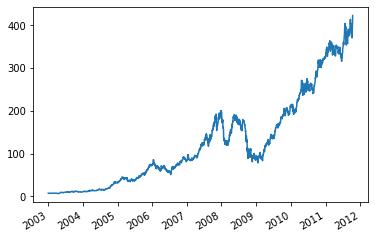

In [97]:
# Введем в рассмотрение оператор rolling, который ведет себя также как resample и groupby. Его можно применить
# к объектам Series и DF, передав аргумент window(равный количеству периодов):


fig = plt.figure()
close_px.AAPL.plot()

<AxesSubplot:>

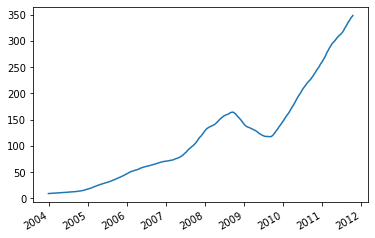

In [112]:
close_px.AAPL.rolling(250).mean().plot() 

# Выражение rolling(250) ведет себя как groupby, но вместо группировки создает объект, который допускает группировку
# по скользящему окну шириной 250 дней
# таким образом здесь мы имеем средние котировки акции в скользящем окне длиной 250 дней

In [104]:
close_px.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2214, freq=None)

<AxesSubplot:>

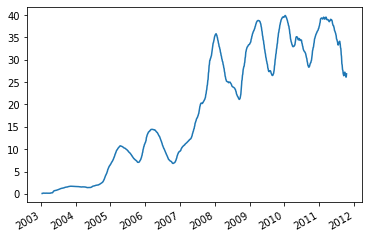

In [129]:
# По умолчанию функции создания скользящих окон требуют, чтобы все значения в окне были отличны от NA. Это
# поведение можно изменить, чтобы учесть возможность отсутствия данных, и  частности тот факт, что в начале временного
# ряда количество периодов данных меньше window:

aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()


aapl_std250.plot()
# стандартное отклонение суточного оборота эпл



# параметр min_periods Минимальное количество наблюдений в окне, 
# необходимое для получения значения; в противном случае результат np.nan.

In [120]:
aapl_std250


2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    26.102069
2011-10-11    26.170785
2011-10-12    26.322769
2011-10-13    26.539215
2011-10-14    26.841851
Name: AAPL, Length: 2214, dtype: float64

In [128]:
# Чтобы вычислить среднее с расширяющимся окном, стоит использовать оператор expanding вместо rolling.
# В этом случае начальное окно расположено в начале временного ряда и увеличивается в размере, пока не охватит
# весь ряд.

# Среднее с расширяющимся окном для ВР aapl_std250 вычисляется так:


expanding_mean = aapl_std250.expanding().mean()    


<AxesSubplot:>

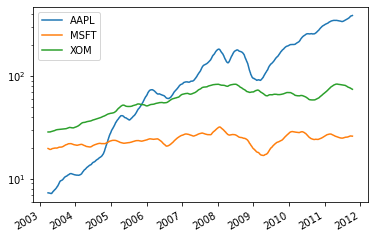

In [138]:
# При вызове функции скользящего окна от имени объекта DF преобразование применяется к каждому столбцу:

close_px.rolling(60).mean().plot(logy=True)

# скользящее среднее котировок акций за 60 дней

In [146]:
# Функция rolling принимает также строку, содержащую фиксированное временое смещение, а не количество периодов.
# Такой вариант может быть полезен для нерегулярных ВР. Точно такие же строки передаются resample(). Например,
# вот как можно было бы вычислить скользящее среднее за 20 дней:

close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [143]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


# Экспоненциально взвешенные функции

In [148]:
# Вместо использования окна постоянного размера, когда веса всех наблюдений одинаковы, можно задать постоянный 
# коэффициент затухания, чтобы повысить вес последних наблюдений. 

# Есть два способа задать коэффициент затухания. Самый популярный - использовать промежуток (span), потому что
# результаты в этом случае получаются сравнимыми с применением простой скользящей оконной функции, для
# которого размер окна равен промежутку.

# Поскольку экспоненциально взвешенная статистика предает больший вес последним наблюдениям, она быстрее 
# адаптируется к изменениям по сравнению с вариантом с равными весам.

# В pandas имеется оператор ewm, который работает совместно с rolling и expanding. В примере нижу скользящее среднее
# котировок акций Apple за 60 дней сравнивается с экспоненциально взвешенным скользящим средним
# для span=30:

aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
2006-01-09     76.05
               ...  
2007-12-24    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Name: AAPL, Length: 502, dtype: float64

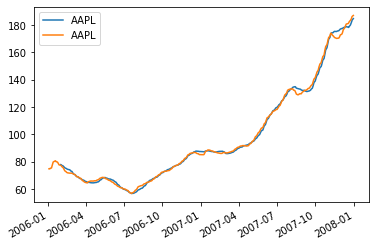

In [153]:
ma30 = aapl_px.rolling(30, min_periods=20).mean().plot()

ewma30 = aapl_px.ewm(span=30).mean().plot()
plt.legend()

In [154]:
close_px.AAPL['2006':'2007']

2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
2006-01-09     76.05
               ...  
2007-12-24    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Name: AAPL, Length: 502, dtype: float64